<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

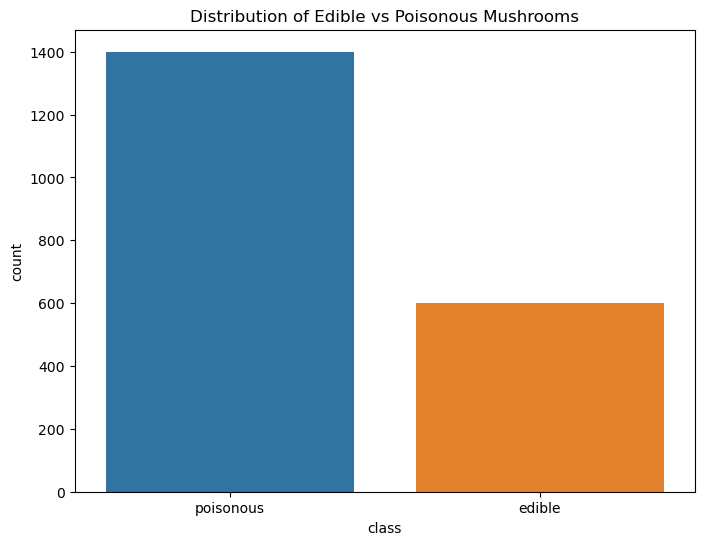

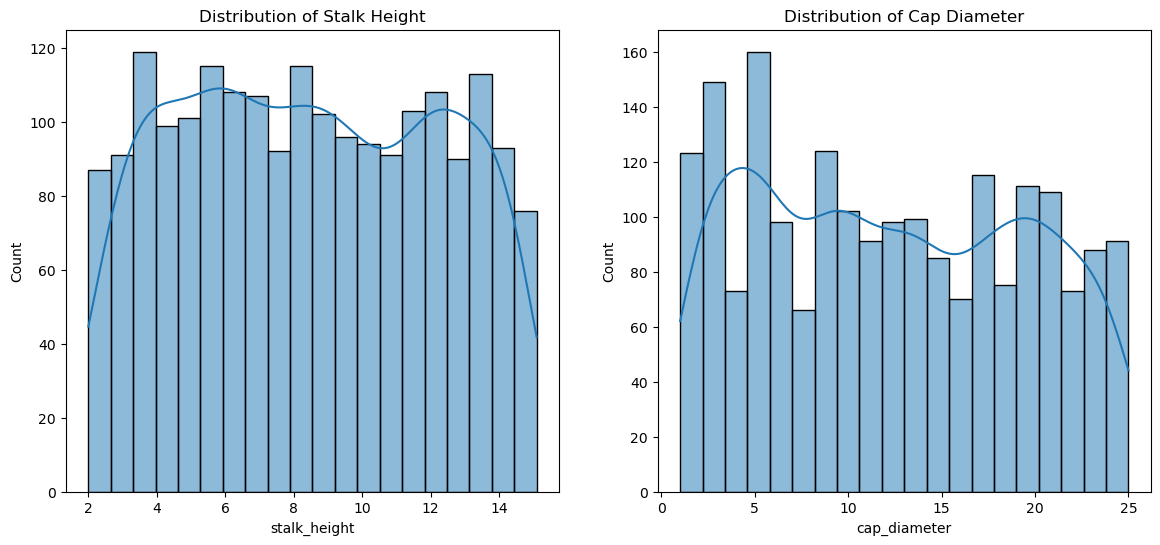

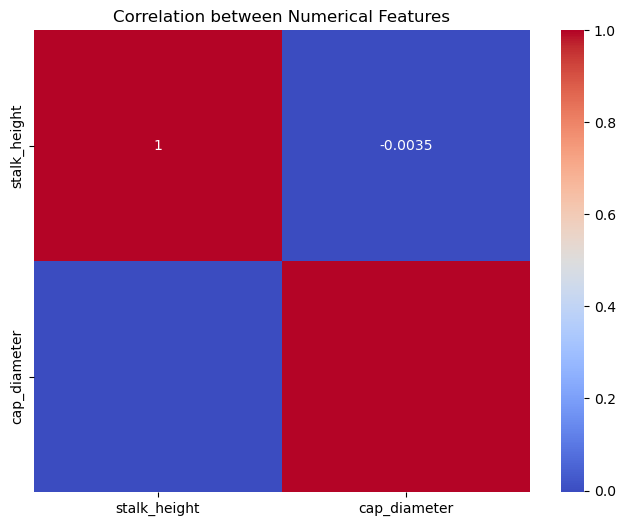

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Mushroom dataset
mushroom_data = pd.read_csv('D:/Data science ass/17/SVM/mushroom.csv')

# Display the first few rows and summary of the dataset
mushroom_data.info()
mushroom_data.head()

# Plotting the distribution of the 'class' column to understand class balance
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=mushroom_data)
plt.title('Distribution of Edible vs Poisonous Mushrooms')
plt.show()

# Visualizing the distribution of 'stalk_height' and 'cap_diameter' using histograms
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(mushroom_data['stalk_height'], kde=True, bins=20)
plt.title('Distribution of Stalk Height')

plt.subplot(1, 2, 2)
sns.histplot(mushroom_data['cap_diameter'], kde=True, bins=20)
plt.title('Distribution of Cap Diameter')

plt.show()

# Visualizing the correlation between numerical features
plt.figure(figsize=(8, 6))
correlation_matrix = mushroom_data[['stalk_height', 'cap_diameter']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Numerical Features')
plt.show()


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
for column in mushroom_data.columns:
    if mushroom_data[column].dtype == 'object':
        mushroom_data[column] = label_encoder.fit_transform(mushroom_data[column])

# Split the dataset into training and testing sets
X = mushroom_data.drop('class', axis=1)
y = mushroom_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1600, 25), (400, 25), (1600,), (400,))

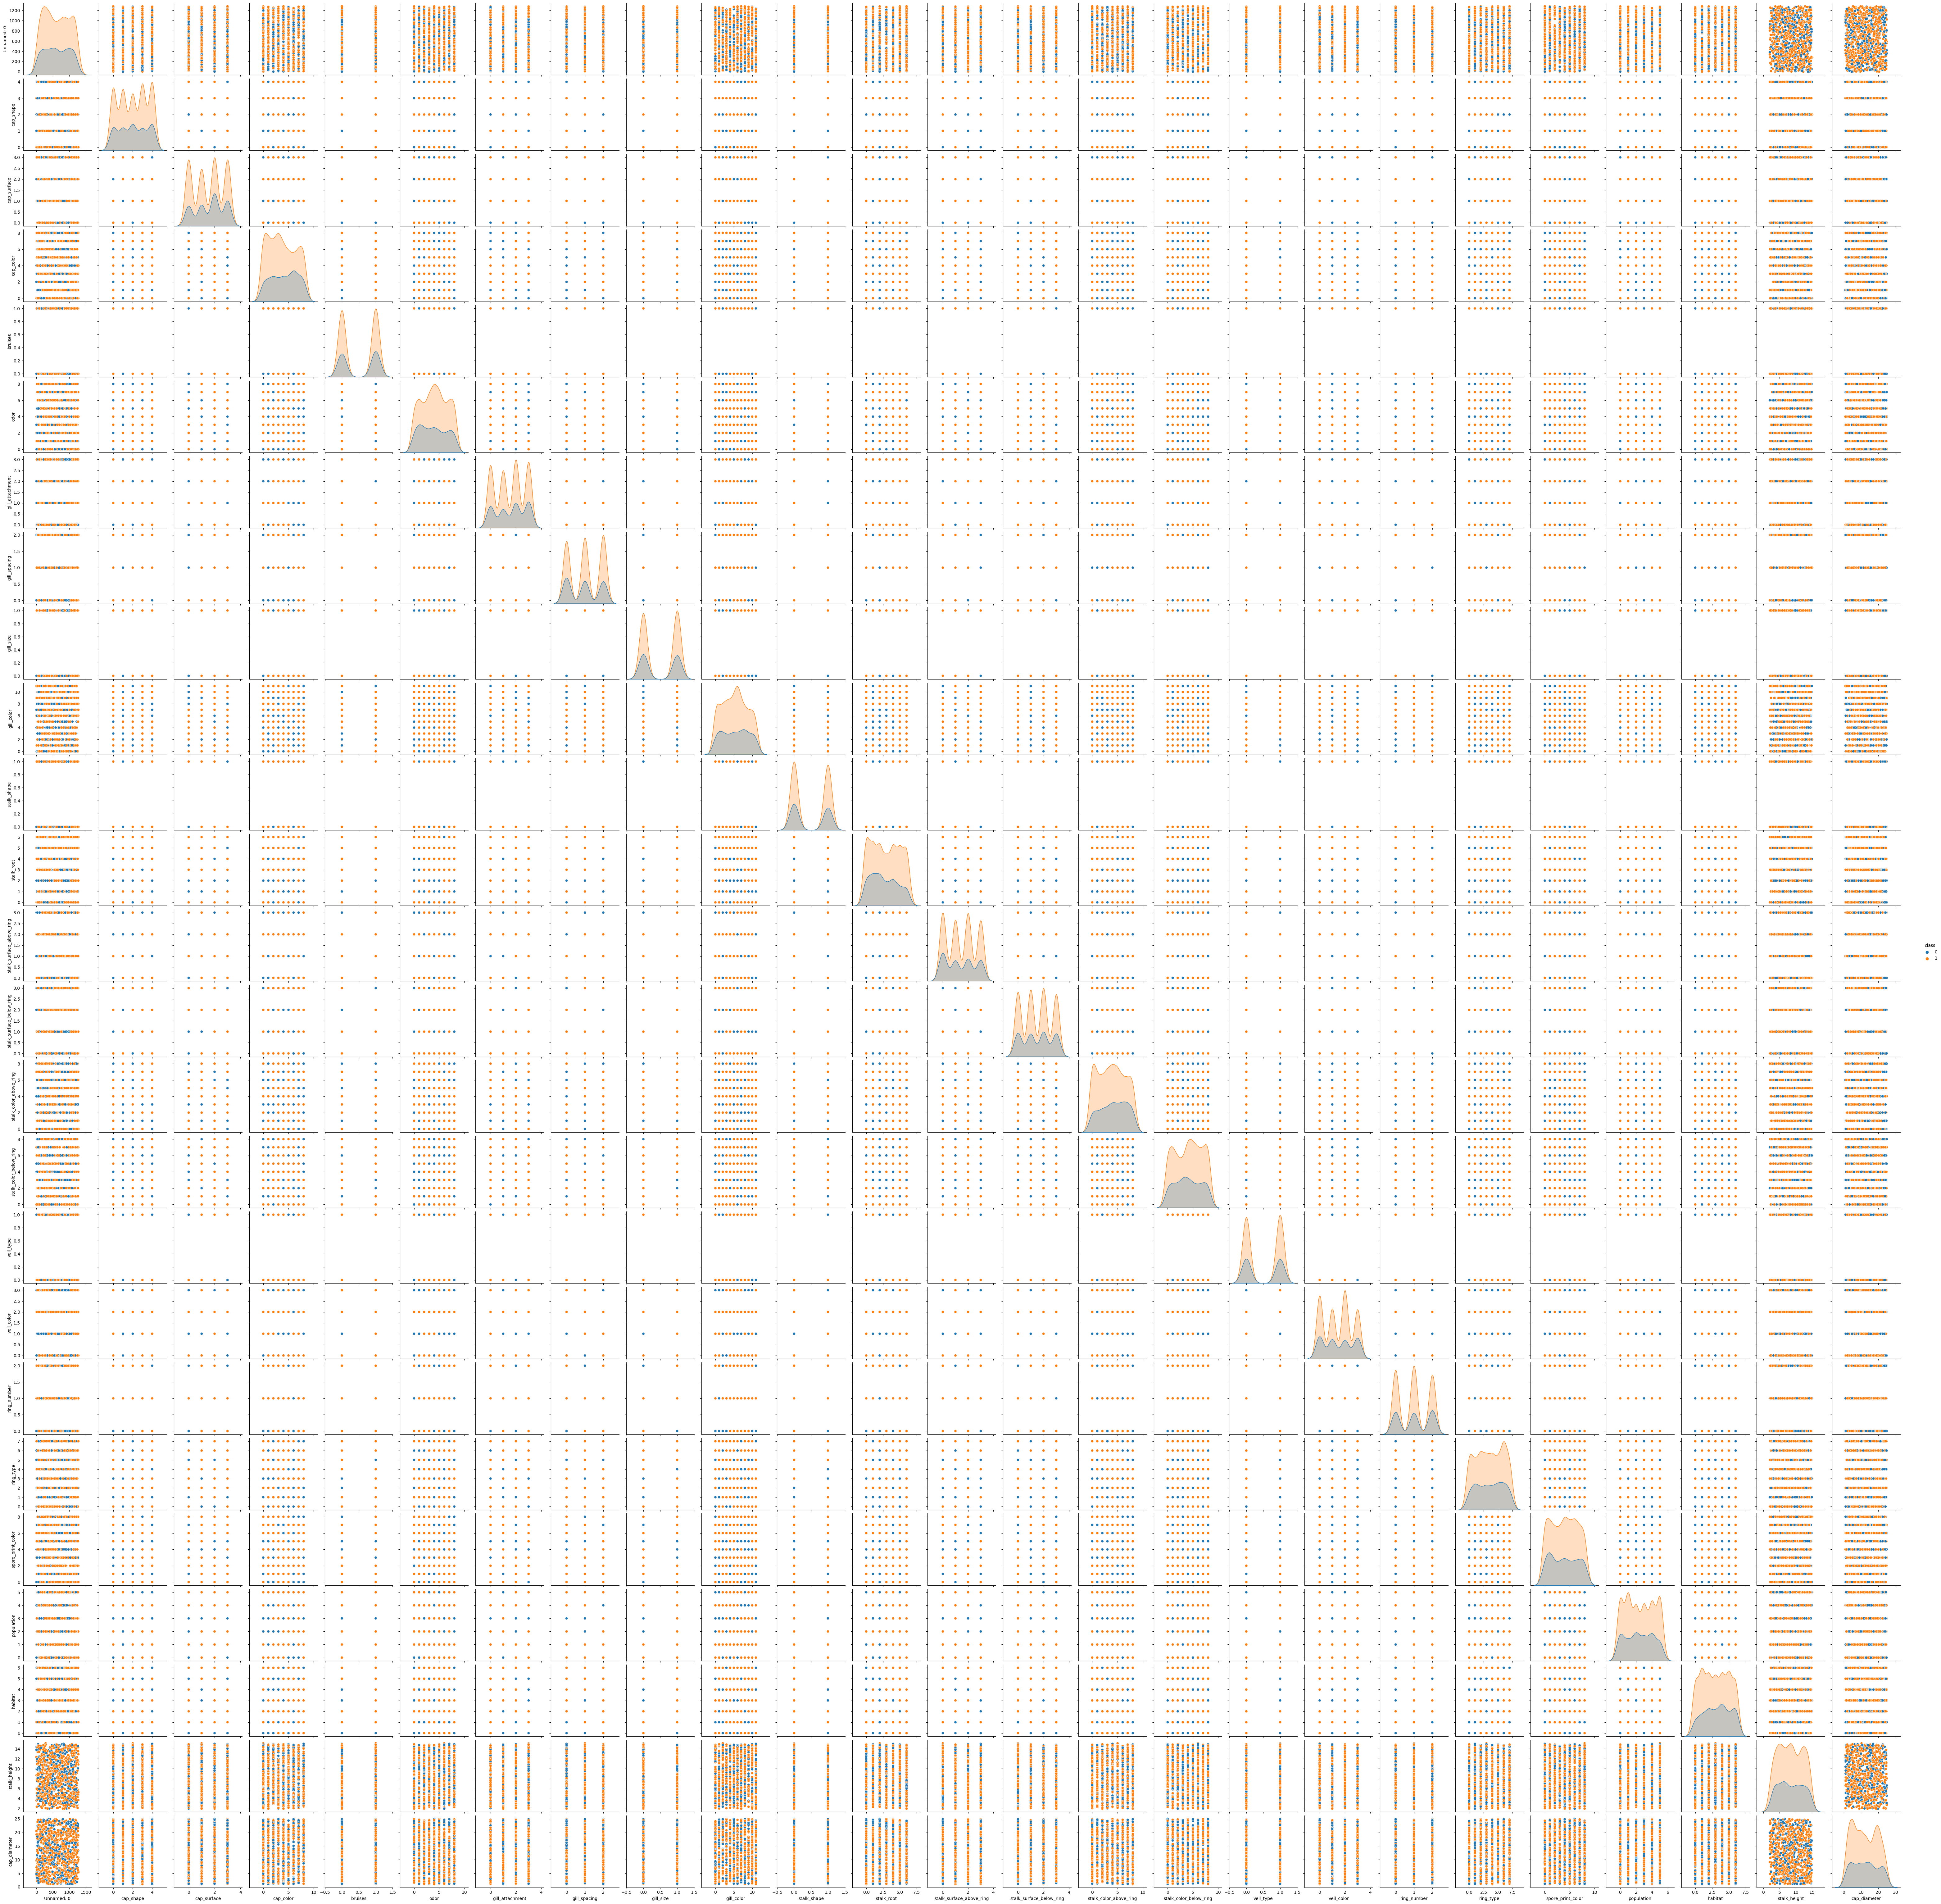

AttributeError: 'numpy.int32' object has no attribute 'startswith'

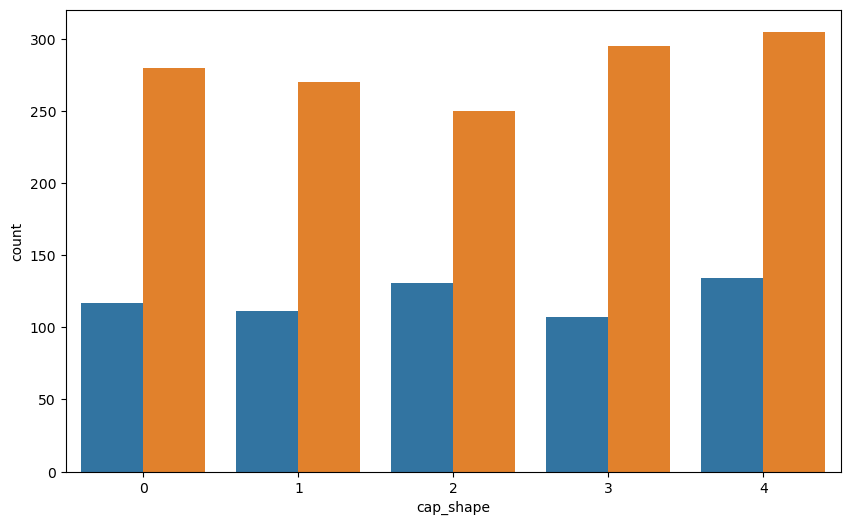

In [3]:
# Visualize pair plots to understand feature distributions and relationships
sns.pairplot(mushroom_data, hue='class')
plt.show()

# Visualize class distributions across a few selected features
selected_features = ['cap_shape', 'cap_color', 'odor', 'population']
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='class', data=mushroom_data)
    plt.title(f'Distribution of {feature} by Class')
    plt.show()


In [4]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Implement a basic SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6675
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

Confusion Matrix:
 [[  0 133]
 [  0 267]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


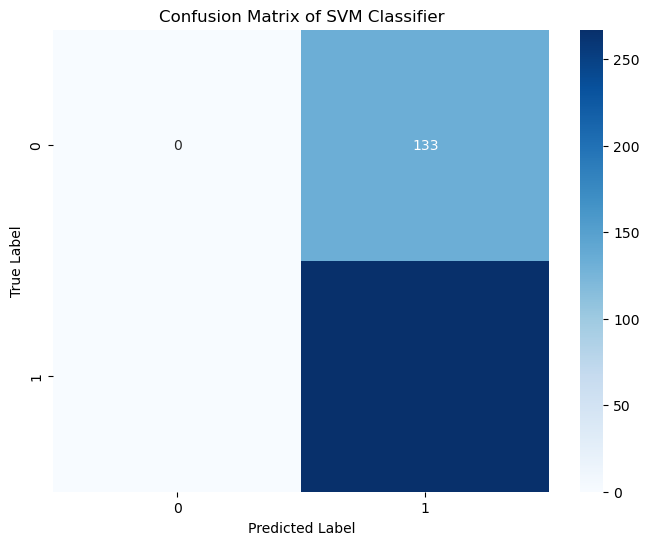

In [5]:
# Visualize the classification results using a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of SVM Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [6]:
# Experiment with different SVM hyperparameters (e.g., kernel type)
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    print(f"Kernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)


Kernel: linear
Accuracy: 0.6675
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

Confusion Matrix:
 [[  0 133]
 [  0 267]]
--------------------------------------------------
Kernel: poly
Accuracy: 0.6675
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

Confusion Matrix:
 [[  0 133]
 [  0 267]]
--------------------------------------------------
Kernel: rbf
Accuracy: 0.6675
Classification Report

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metr